# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [17]:
#Checando as colunas do dataframe
sinasc_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [15]:
latitude = pd.cut(x=sinasc_raw['munResLat'],bins=[sinasc_raw.munResLat.min(),
                                                  -10.5,sinasc_raw.munResLat.max()])

pd.pivot_table(data = sinasc_raw,
               values=['munResLon','munResAlt'],
               index=latitude,
               aggfunc={('Soma',sum),('Média','mean'),('Mínimo',min),('Max',max),
               ('Mediana','median'),('Desvio Padrão','std'),('Variância',np.var)},
                dropna=False, sort=True).rename(columns = {'munResLon':'Longitude do município de residência',
                                                    'munResAlt': 'Altitude do município de residência'})

C:\Users\User\AppData\Local\Temp\ipykernel_10148\3092029838.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  pd.pivot_table(data = sinasc_raw,
C:\Users\User\AppData\Local\Temp\ipykernel_10148\3092029838.py:4: FutureWarning: The provided callable <function var at 0x000001F0105809A0> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  pd.pivot_table(data = sinasc_raw,
C:\Users\User\AppData\Local\Temp\ipykernel_10148\3092029838.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(data = 

Altitude do município de residência                 \
                                      Desvio Padrão    Max Mediana   
munResLat                                                            
(-13.5, -10.5]                           140.196000  595.0   191.0   
(-10.5, -8.769]                           30.071422  192.0    87.0   
NaN                                        0.000000  236.0   236.0   

                                                             \
                      Média Mínimo       Soma     Variância   
munResLat                                                     
(-13.5, -10.5]   254.903198  133.0  3291565.0  19654.918293   
(-10.5, -8.769]  109.050520   85.0  1530415.0    904.290400   
NaN              236.000000  236.0    18880.0      0.000000   

                Longitude do município de residência                      \
                                       Desvio Padrão       Max   Mediana   
munResLat                                                                  
(-13.5, -10.5]                              1.230650 -60.13858 -61.90944   
(-10.5, -8.769]                             0.627696 -61.99959 -63.83145   
NaN                                         0.000000 -60.54431 -60.54431   

                                                              
                     Média    Mínimo          Soma Variância  
munResLat                                                     
(-13.5, -10.5]  -61.907649 -65.32395 -799413.46543  1.514499  
(-10.5, -8.769] -63.547244 -65.32915 -891822.01897  0.394002  
NaN             -60.544310 -60.54431   -4843.54480  0.000000

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [21]:
area = pd.cut(x=sinasc_raw.munResArea, bins=[sinasc_raw.munResArea.min(),
                                             3000, sinasc_raw.munResArea.max()])

pd.pivot_table(data = sinasc_raw, values=['APGAR5','CONSULTAS'],index=area,
               aggfunc={('Soma',sum),('Média','mean'),('Mínimo',min),('Max',max),
               ('Mediana','median'),('Desvio Padrão','std'),('Variância',np.var)},
               dropna=False, sort=True).rename(columns={'APGAR5':'Valores de APGAR no 5º minuto',
                                                        'CONSULTAS':'Número de consultas de pré-natal'})

C:\Users\User\AppData\Local\Temp\ipykernel_10148\1140403151.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  pd.pivot_table(data = sinasc_raw, values=['APGAR5','CONSULTAS'],index=area,
C:\Users\User\AppData\Local\Temp\ipykernel_10148\1140403151.py:4: FutureWarning: The provided callable <function var at 0x000001F0105809A0> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  pd.pivot_table(data = sinasc_raw, values=['APGAR5','CONSULTAS'],index=area,
C:\Users\User\AppData\Local\Temp\ipykernel_10148\1140403151.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used direct

Valores de APGAR no 5º minuto                          \
                                    Desvio Padrão   Max Mediana     Média   
munResArea                                                                  
(459.978, 3000.0]                        0.801427  10.0     9.0  9.131584   
(3000.0, 34096.394]                      0.787591  10.0     9.0  9.190836   
NaN                                      0.779238  10.0     9.0  9.046154   

                                                \
                    Mínimo      Soma Variância   
munResArea                                       
(459.978, 3000.0]      0.0   46982.0  0.642286   
(3000.0, 34096.394]    0.0  199579.0  0.620299   
NaN                    7.0     588.0  0.607212   

                    Número de consultas de pré-natal                        \
                                       Desvio Padrão Max Mediana     Média   
munResArea                                                                   
(459.978, 3000.0]                           0.608679   9     4.0  3.738506   
(3000.0, 34096.394]                         0.820967   9     4.0  3.537326   
NaN                                         0.601281   4     4.0  3.830769   

                                             
                    Mínimo   Soma Variância  
munResArea                                   
(459.978, 3000.0]        1  19272  0.370490  
(3000.0, 34096.394]      1  77142  0.673986  
NaN                      1    249  0.361538

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [25]:
altitude_2 = pd.qcut(x=sinasc_raw.munResAlt,q=5)

pd.pivot_table(data=sinasc_raw,values=['APGAR1','SEMAGESTAC'], index=altitude_2,
               aggfunc={('Soma',sum),('Média','mean'),('Mínimo',min),('Max',max),
               ('Mediana','median'),('Desvio Padrão','std'),('Variância',np.var)},
               dropna=False, sort=True).rename(columns={'APGAR1':'Valores APGAR no 1º minuto',
                                                        'SEMAGESTAC':'Número de semanas de gestação'})

C:\Users\User\AppData\Local\Temp\ipykernel_10148\3627102876.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  pd.pivot_table(data=sinasc_raw,values=['APGAR1','SEMAGESTAC'], index=altitude_2,
C:\Users\User\AppData\Local\Temp\ipykernel_10148\3627102876.py:3: FutureWarning: The provided callable <function var at 0x000001F0105809A0> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  pd.pivot_table(data=sinasc_raw,values=['APGAR1','SEMAGESTAC'], index=altitude_2,
C:\Users\User\AppData\Local\Temp\ipykernel_10148\3627102876.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be u

Valores APGAR no 1º minuto                                 \
                            Desvio Padrão   Max Mediana     Média Mínimo   
munResAlt                                                                  
(84.999, 87.0]                   0.936486  10.0     8.0  8.270965    0.0   
(87.0, 139.0]                    1.120557  10.0     8.0  8.063857    0.0   
(139.0, 161.0]                   1.066452  10.0     8.0  8.057855    0.0   
(161.0, 227.0]                   0.911067  10.0     8.0  8.041548    0.0   
(227.0, 595.0]                   0.961782  10.0     8.0  8.133904    0.0   
NaN                                   NaN   9.0     9.0  9.000000    9.0   

                                  Número de semanas de gestação                \
                   Soma Variância                 Desvio Padrão   Max Mediana   
munResAlt                                                                       
(84.999, 87.0]  72098.0  0.877006                      2.100161  45.0    39.0   
(87.0, 139.0]   24877.0  1.255649                      1.968434  45.0    39.0   
(139.0, 161.0]  35237.0  1.137320                      2.159551  45.0    39.0   
(161.0, 227.0]  48000.0  0.830043                      1.892260  45.0    39.0   
(227.0, 595.0]  38937.0  0.925025                      1.920212  45.0    39.0   
NaN                 9.0       NaN                           NaN  36.0    36.0   

                                                      
                    Média Mínimo      Soma Variância  
munResAlt                                             
(84.999, 87.0]  38.570331   21.0  311224.0  4.410676  
(87.0, 139.0]   38.558386   22.0  116562.0  3.874734  
(139.0, 161.0]  38.629548   19.0  158188.0  4.663660  
(161.0, 227.0]  38.502806   19.0  226435.0  3.580647  
(227.0, 595.0]  38.595001   21.0  182207.0  3.687212  
NaN             36.000000   36.0      36.0       NaN

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [33]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

sinasc_raw.set_index(['munResNome']).groupby(by=[imediatas],dropna=False)[['CONTADOR']].count()

,CONTADOR
munResNome,
Ariquemes,3233
Cacoal,4603
Jaru,1683
Ji-Paraná,4962
Porto Velho,10096
Vilhena,2450
NaN,1


In [35]:
sinasc_municipio = sinasc_raw.copy()
sinasc_municipio.set_index(keys='munResNome',inplace=True)

sinasc_municipio = pd.pivot_table(data=sinasc_municipio,values='IDADEMAE',index=['DTNASC',
                                                                                 imediatas],
                                  aggfunc='mean',
                                  dropna=False,
                                  sort=True).rename(columns={'IDADEMAE':'Idade média das Mães'})

sinasc_municipio

Idade média das Mães
DTNASC     munResNome                       
2019-01-01 Ariquemes               23.200000
           Cacoal                  23.250000
           Jaru                    31.000000
           Ji-Paraná               24.142857
           Porto Velho             21.388889
...                                      ...
2019-12-31 Jaru                    23.333333
           Ji-Paraná               26.200000
           Porto Velho             26.000000
           Vilhena                 23.857143
           NaN                           NaN

[2555 rows x 1 columns]

In [41]:
sinasc_municipio_imediata = sinasc_municipio.rename_axis(index={'munResNome':'Região imediata de Rondônia'}).unstack()

sinasc_municipio_imediata

Idade média das Mães                        \
Região imediata de Rondônia                  NaN  Ariquemes     Cacoal   
DTNASC                                                                   
2019-01-01                                   NaN  23.200000  23.250000   
2019-01-02                                   NaN  26.166667  27.666667   
2019-01-03                                   NaN  24.142857  27.846154   
2019-01-04                                   NaN  24.666667  25.230769   
2019-01-05                                   NaN  22.888889  23.200000   
...                                          ...        ...        ...   
2019-12-27                                   NaN  24.666667  24.000000   
2019-12-28                                   NaN  23.833333  22.888889   
2019-12-29                                   NaN  23.166667  24.100000   
2019-12-30                                   NaN  23.666667  28.437500   
2019-12-31                                   NaN  24.666667  23.400000   

                                                                          
Região imediata de Rondônia       Jaru  Ji-Paraná Porto Velho    Vilhena  
DTNASC                                                                    
2019-01-01                   31.000000  24.142857   21.388889  27.750000  
2019-01-02                   30.800000  25.545455   26.050000  28.727273  
2019-01-03                   26.000000  27.000000   26.638889  23.375000  
2019-01-04                   22.500000  23.125000   28.814815  26.000000  
2019-01-05                   23.250000  27.100000   27.250000  28.200000  
...                                ...        ...         ...        ...  
2019-12-27                   25.333333  27.466667   28.410256  27.000000  
2019-12-28                   23.333333  26.375000   26.291667  22.666667  
2019-12-29                   24.666667  24.125000   25.470588  24.250000  
2019-12-30                   28.857143  28.750000   27.777778  26.600000  
2019-12-31                   23.333333  26.200000   26.000000  23.857143  

[365 rows x 7 columns]

In [57]:
pd.pivot_table(data=sinasc_municipio_imediata['Idade média das Mães'],
               index='DTNASC',
               margins=False,)

Região imediata de Rondônia,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena,NaN
DTNASC,,,,,,,
2019-01-01,23.200000,23.250000,31.000000,24.142857,21.388889,27.750000,NaN
2019-01-02,26.166667,27.666667,30.800000,25.545455,26.050000,28.727273,NaN
2019-01-03,24.142857,27.846154,26.000000,27.000000,26.638889,23.375000,NaN
2019-01-04,24.666667,25.230769,22.500000,23.125000,28.814815,26.000000,NaN
2019-01-05,22.888889,23.200000,23.250000,27.100000,27.250000,28.200000,NaN
...,...,...,...,...,...,...,...
2019-12-27,24.666667,24.000000,25.333333,27.466667,28.410256,27.000000,NaN
2019-12-28,23.833333,22.888889,23.333333,26.375000,26.291667,22.666667,NaN
2019-12-29,23.166667,24.100000,24.666667,24.125000,25.470588,24.250000,NaN


Text(0, 0.5, 'Idade média das mãe')

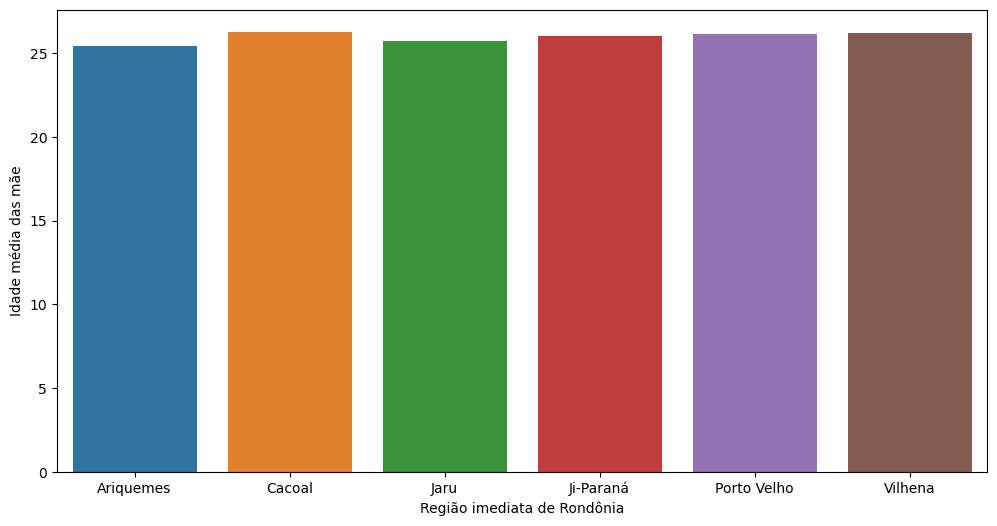

In [61]:
plt.subplots(figsize=(12,6))
sns.barplot(x='munResNome',y='Idade média das Mães',
            data=sinasc_municipio.groupby('munResNome').mean().reset_index());
plt.xlabel(xlabel='Região imediata de Rondônia')
plt.ylabel(ylabel='Idade média das mãe')

Text(0, 0.5, 'Idade média das Mães')

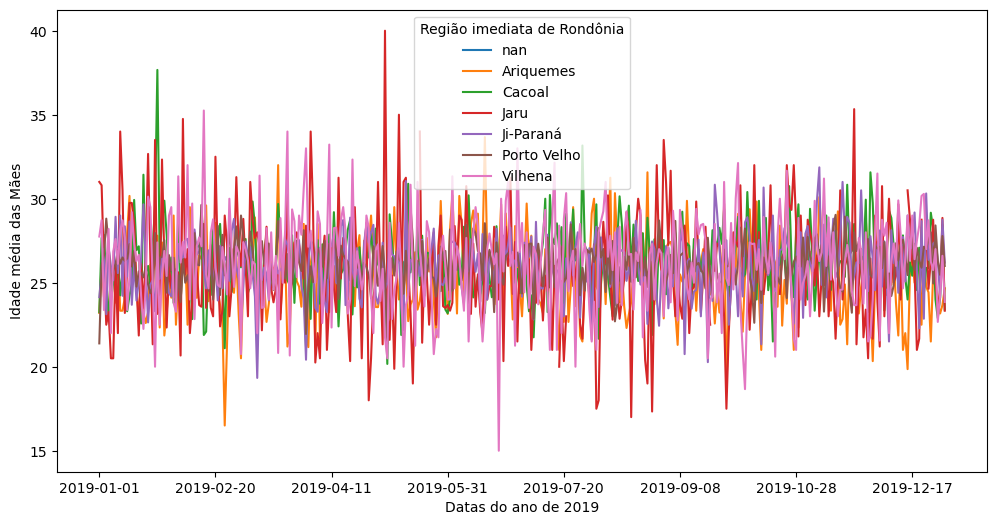

In [65]:
sinasc_municipio_imediata['Idade média das Mães'].plot(figsize=(12,6))
plt.xlabel(xlabel='Datas do ano de 2019')
plt.ylabel(ylabel='Idade média das Mães')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [67]:
IDH = {
    "Porto Velho": "IDH-M alto",
    "Vilhena": "IDH-M alto",
    "Cacoal": "IDH-M alto",
    "Ji-Paraná": "IDH-M alto",
    "Pimenta Bueno": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Rolim de Moura": "IDH-M alto",
    
    "Cerejeiras": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "Castanheiras": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Cabixi": "IDH-M médio",
    "Candeias do Jamari":  "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Mirante da Serra": "IDH-M médio",
    "Alvorada D'Oeste": "IDH-M médio",
    "Teixeirópolis": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Primavera de Rondônia": "IDH-M médio",
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Alto Paraíso": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Cujubim": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    
    "Seringueiras": "IDH-M baixo",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Nova União": "IDH-M baixo",
    "Nova Mamoré": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo"
}

In [74]:
sinasc_raw.set_index(['munResNome']).groupby(by=[IDH],dropna=False)[['CONTADOR']].count()



,CONTADOR
munResNome,
IDH-M alto,16855
IDH-M baixo,1826
IDH-M médio,8346
NaN,1


In [84]:
sinasc_municipio = sinasc_raw.copy()
sinasc_IDH = sinasc_municipio[['munResNome','APGAR5','QTDGESTANT','CONSULTAS','IDADEMAE']]

sinasc_IDH.set_index(keys='munResNome',inplace=True)
sinasc_IDH.groupby(by=IDH,dropna=False,sort=True).agg([('Quantidade','count'),
                                                      ('Mínimo','min'),('Máximo','max'),
                                                        ('Mediana','median')]
                                                     ).rename(columns={'QTDGESTANT':'Quantidade de gestações',
                                                                       'CONSULTAS':'Número de consultas de pré-natal'})
                            

APGAR5                       Quantidade de gestações         \
            Quantidade Mínimo Máximo Mediana              Quantidade Mínimo   
munResNome                                                                    
IDH-M alto       16794    0.0   10.0     9.0                   15827    0.0   
IDH-M baixo       1820    1.0   10.0     9.0                    1799    0.0   
IDH-M médio       8310    0.0   10.0     9.0                    8189    0.0   
NaN                  1   10.0   10.0    10.0                       1    2.0   

                           Número de consultas de pré-natal                \
            Máximo Mediana                       Quantidade Mínimo Máximo   
munResNome                                                                  
IDH-M alto    14.0     1.0                            16855      1      9   
IDH-M baixo   11.0     1.0                             1826      1      9   
IDH-M médio   52.0     1.0                             8346      1      9   
NaN            2.0     2.0                                1      1      1   

                      IDADEMAE                        
            Mediana Quantidade Mínimo Máximo Mediana  
munResNome                                            
IDH-M alto      4.0      16855     12     47    26.0  
IDH-M baixo     4.0       1826     13     46    25.0  
IDH-M médio     4.0       8346     11     53    25.0  
NaN             1.0          1     24     24    24.0

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [86]:
IFDM = {
    "Ariquemes": "IFDM Desenvolvimento moderado",
    "Vilhena": "IFDM Desenvolvimento moderado",
    "Pimenta Bueno": "IFDM Desenvolvimento moderado",
    "Porto Velho": "IFDM Desenvolvimento moderado",
    "Ji-Paraná": "IFDM Desenvolvimento moderado",
    "Cacoal": "IFDM Desenvolvimento moderado",
    "Santa Luzia D'Oeste": "IFDM Desenvolvimento moderado",
    "Rolim de Moura": "IFDM Desenvolvimento moderado",
    "Chupinguaia": "IFDM Desenvolvimento moderado",
    "São Miguel do Guaporé": "IFDM Desenvolvimento moderado",
    "Pimenteiras do Oeste": "IFDM Desenvolvimento moderado",
    "Teixeirópolis": "IFDM Desenvolvimento moderado",
    "Colorado do Oeste": "IFDM Desenvolvimento moderado",
    "Jaru": "IFDM Desenvolvimento moderado",
    "Rio Crespo": "IFDM Desenvolvimento moderado",
    "Primavera de Rondônia": "IFDM Desenvolvimento moderado",
    "Alta Floresta D'Oeste": "IFDM Desenvolvimento moderado",
    "Ouro Preto do Oeste": "IFDM Desenvolvimento moderado",
    "São Francisco do Guaporé": "IFDM Desenvolvimento moderado",
    "Candeias do Jamari": "IFDM Desenvolvimento moderado",
    "Buritis": "IFDM Desenvolvimento moderado",
    "São Felipe D'Oeste": "IFDM Desenvolvimento moderado",
    "Presidente Médici": "IFDM Desenvolvimento moderado",
    "Cerejeiras": "IFDM Desenvolvimento moderado",
    "Monte Negro": "IFDM Desenvolvimento moderado",
    "Urupá": "IFDM Desenvolvimento moderado",
        
    "Espigão D'Oeste": "IFDM Desenvolvimento regular",
    "Seringueiras": "IFDM Desenvolvimento regular",
    "Alvorada D'Oeste": "IFDM Desenvolvimento regular",
    "Itapuã do Oeste": "IFDM Desenvolvimento regular",
    "Cabixi": "IFDM Desenvolvimento regular",
    "Novo Horizonte do Oeste": "IFDM Desenvolvimento regular",
    "Nova Brasilândia D'Oeste": "IFDM Desenvolvimento regular",
    "Vale do Paraíso": "IFDM Desenvolvimento regular",
    "Corumbiara": "IFDM Desenvolvimento regular",
    "Alto Paraíso": "IFDM Desenvolvimento regular",
    "Cacaulândia": "IFDM Desenvolvimento regular",
    "Vale do Anari": "IFDM Desenvolvimento regular",
    "Ministro Andreazza": "IFDM Desenvolvimento regular",
    "Costa Marques": "IFDM Desenvolvimento regular",
    "Nova União": "IFDM Desenvolvimento regular",
    "Guajará-Mirim": "IFDM Desenvolvimento regular",
    "Mirante da Serra": "IFDM Desenvolvimento regular",
    "Parecis": "IFDM Desenvolvimento regular",
    "Castanheiras": "IFDM Desenvolvimento regular",
    "Theobroma": "IFDM Desenvolvimento regular",
    "Machadinho D'Oeste": "IFDM Desenvolvimento regular",
    "Campo Novo de Rondônia": "IFDM Desenvolvimento regular",
    "Nova Mamoré": "IFDM Desenvolvimento regular",
    "Cujubim": "IFDM Desenvolvimento regular",
    "Alto Alegre dos Parecis": "IFDM Desenvolvimento regular",
    "Governador Jorge Teixeira": "IFDM Desenvolvimento regular",
}

sinasc_raw.set_index(['munResNome']).groupby(by=[IFDM], dropna=False)[['CONTADOR']].count()

,CONTADOR
munResNome,
IFDM Desenvolvimento moderado,21946
IFDM Desenvolvimento regular,5081
NaN,1


In [88]:
sinasc_IFDM = sinasc_municipio[['munResNome','APGAR5', 'QTDGESTANT', 'CONSULTAS', 'IDADEMAE']]

sinasc_IFDM.set_index(keys='munResNome',inplace=True)

sinasc_IFDM.groupby(by=[IFDM], 
                    dropna=False, 
                    sort=True
                   ).agg([('Quantidade','count'), 
                         ('Mínimo','min'), 
                         ('Máximo','max'), 
                         ('Mediana','median')]
                        ).rename(columns={'QTDGESTANT':'Quantidade de gestações anteriores', 
                                         'CONSULTAS':'Número de consultas de pré-natal'})

APGAR5                        \
                              Quantidade Mínimo Máximo Mediana   
munResNome                                                       
IFDM Desenvolvimento moderado      21867    0.0   10.0     9.0   
IFDM Desenvolvimento regular        5057    0.0   10.0     9.0   
NaN                                    1   10.0   10.0    10.0   

                              Quantidade de gestações anteriores         \
                                                      Quantidade Mínimo   
munResNome                                                                
IFDM Desenvolvimento moderado                              20806    0.0   
IFDM Desenvolvimento regular                                5009    0.0   
NaN                                                            1    2.0   

                                             Número de consultas de pré-natal  \
                              Máximo Mediana                       Quantidade   
munResNome                                                                      
IFDM Desenvolvimento moderado   14.0     1.0                            21946   
IFDM Desenvolvimento regular    52.0     1.0                             5081   
NaN                              2.0     2.0                                1   

                                                      IDADEMAE                \
                              Mínimo Máximo Mediana Quantidade Mínimo Máximo   
munResNome                                                                     
IFDM Desenvolvimento moderado      1      9     4.0      21946     12     53   
IFDM Desenvolvimento regular       1      9     4.0       5081     11     52   
NaN                                1      1     1.0          1     24     24   

                                       
                              Mediana  
munResNome                             
IFDM Desenvolvimento moderado    26.0  
IFDM Desenvolvimento regular     25.0  
NaN                              24.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [92]:
PIB = {
    "Porto Velho": "PIB Acima de 1 Bilhão",
    "Ji-Paraná": "PIB Acima de 1 Bilhão",
    "Vilhena": "PIB Acima de 1 Bilhão",
    "Ariquemes": "PIB Acima de 1 Bilhão",
    "Cacoal": "PIB Acima de 1 Bilhão",
    "Jaru": "PIB Acima de 1 Bilhão",
    "Rolim de Moura": "PIB Acima de 1 Bilhão",
    "Pimenta Bueno": "PIB Acima de 1 Bilhão",

    "Guajará-Mirim": "PIB Acima de 500 Milhões",
    "Ouro Preto do Oeste": "PIB Acima de 500 Milhões",
    "Buritis": "PIB Acima de 500 Milhões",
    "Machadinho D'Oeste": "PIB Acima de 500 Milhões",
    "Espigão D'Oeste": "PIB Acima de 500 Milhões",
    "São Miguel do Guaporé": "PIB Acima de 500 Milhões",
    "Candeias do Jamari": "PIB Acima de 500 Milhões",
    "Nova Mamoré": "PIB Acima de 500 Milhões",
    "Cerejeiras": "PIB Acima de 500 Milhões",

    "Alta Floresta D'Oeste": "PIB Acima de 300 Milhões",
    "Presidente Médici": "PIB Acima de 300 Milhões",
    "Cujubim": "PIB Acima de 300 Milhões",
    "Nova Brasilândia D'Oeste": "PIB Acima de 300 Milhões",
    "Alto Paraíso": "PIB Acima de 300 Milhões",
    "São Francisco do Guaporé": "PIB Acima de 300 Milhões",
    "Colorado do Oeste": "PIB Acima de 300 Milhões",

    "Monte Negro": "PIB Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "PIB Acima de 200 Milhões",
    "Campo Novo de Rondônia": "PIB Acima de 200 Milhões",
    "Alvorada D'Oeste": "PIB Acima de 200 Milhões",

    "Chupinguaia": "PIB Acima de 100 Milhões",
    "Corumbiara": "PIB Acima de 100 Milhões",
    "Ministro Andreazza": "PIB Acima de 100 Milhões",
    "Urupá": "PIB Acima de 100 Milhões",
    "Costa Marques": "PIB Acima de 100 Milhões",
    "Seringueiras": "PIB Acima de 100 Milhões",
    "Mirante da Serra": "PIB Acima de 100 Milhões",
    "Governador Jorge Teixeira": "PIB Acima de 100 Milhões",
    "Theobroma": "PIB Acima de 100 Milhões",
    "Santa Luzia D'Oeste": "PIB Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "PIB Acima de 100 Milhões",
    "Itapuã do Oeste": "PIB Acima de 100 Milhões",
    "Vale do Paraíso": "PIB Acima de 100 Milhões",
    "Cacaulândia": "PIB Acima de 100 Milhões",
    "Cabixi": "PIB Acima de 100 Milhões",
    "Vale do Anari": "PIB Acima de 100 Milhões",

    "Nova União": "PIB Até 100 Milhões",
    "Parecis": "PIB Até 100 Milhões",
    "Rio Crespo": "PIB Até 100 Milhões",
    "Pimenteiras do Oeste": "PIB Até 100 Milhões",
    "Teixeirópolis": "PIB Até 100 Milhões",
    "São Felipe D'Oeste": "PIB Até 100 Milhões",
    "Castanheiras": "PIB Até 100 Milhões",
    "Primavera de Rondônia": "PIB Até 100 Milhões",
}

sinasc_raw.set_index(['munResNome']).groupby(by=[PIB], dropna=False)[['CONTADOR']].count()

,CONTADOR
munResNome,
PIB Acima de 1 Bilhão,17736
PIB Acima de 100 Milhões,1952
PIB Acima de 200 Milhões,724
PIB Acima de 300 Milhões,1880
PIB Acima de 500 Milhões,4304
PIB Até 100 Milhões,431
NaN,1


In [135]:
sinasc_PIB = sinasc_municipio[['munResNome','APGAR5', 'QTDGESTANT', 'CONSULTAS', 'IDADEMAE']]

sinasc_PIB.set_index(keys='munResNome', inplace=True)

sinasc_PIB.groupby(by=PIB, 
                   dropna=False, 
                   sort=True
                  ).agg([('Quantidade','count'),('Média','mean'), 
                         ('Mínimo','min'), 
                         ('Máximo','max'), 
                         ('Mediana','median')]
                       ).rename(columns={'QTDGESTANT':'Quantidade de gestações anteriores', 
                                         'CONSULTAS':'Número de consultas de pré-natal'})

APGAR5                                   \
                         Quantidade      Média Mínimo Máximo Mediana   
munResNome                                                             
PIB Acima de 1 Bilhão         17675   9.166223    0.0   10.0     9.0   
PIB Acima de 100 Milhões       1944   9.168210    1.0   10.0     9.0   
PIB Acima de 200 Milhões        724   9.265193    1.0   10.0     9.0   
PIB Acima de 300 Milhões       1878   9.078275    0.0   10.0     9.0   
PIB Acima de 500 Milhões       4272   9.272004    0.0   10.0     9.0   
PIB Até 100 Milhões             431   9.132251    0.0   10.0     9.0   
NaN                               1  10.000000   10.0   10.0    10.0   

                         Quantidade de gestações anteriores                   \
                                                 Quantidade     Média Mínimo   
munResNome                                                                     
PIB Acima de 1 Bilhão                                 16702  1.268052    0.0   
PIB Acima de 100 Milhões                               1920  1.225521    0.0   
PIB Acima de 200 Milhões                                710  1.147887    0.0   
PIB Acima de 300 Milhões                               1868  1.192719    0.0   
PIB Acima de 500 Milhões                               4187  1.399331    0.0   
PIB Até 100 Milhões                                     428  1.126168    0.0   
NaN                                                       1  2.000000    2.0   

                                        Número de consultas de pré-natal  \
                         Máximo Mediana                       Quantidade   
munResNome                                                                 
PIB Acima de 1 Bilhão      14.0     1.0                            17736   
PIB Acima de 100 Milhões   52.0     1.0                             1952   
PIB Acima de 200 Milhões    9.0     1.0                              724   
PIB Acima de 300 Milhões    9.0     1.0                             1880   
PIB Acima de 500 Milhões   14.0     1.0                             4304   
PIB Até 100 Milhões         7.0     1.0                              431   
NaN                         2.0     2.0                                1   

                                                           IDADEMAE  \
                             Média Mínimo Máximo Mediana Quantidade   
munResNome                                                            
PIB Acima de 1 Bilhão     3.541103      1      9     4.0      17736   
PIB Acima de 100 Milhões  3.748975      1      9     4.0       1952   
PIB Acima de 200 Milhões  3.671271      1      4     4.0        724   
PIB Acima de 300 Milhões  3.722872      1      9     4.0       1880   
PIB Acima de 500 Milhões  3.549954      1      9     4.0       4304   
PIB Até 100 Milhões       3.719258      1      4     4.0        431   
NaN                       1.000000      1      1     1.0          1   

                                                           
                              Média Mínimo Máximo Mediana  
munResNome                                                 
PIB Acima de 1 Bilhão     26.265562     12     47    26.0  
PIB Acima de 100 Milhões  25.662910     12     52    25.0  
PIB Acima de 200 Milhões  25.323204     13     44    25.0  
PIB Acima de 300 Milhões  25.833511     11     53    25.0  
PIB Acima de 500 Milhões  25.782528     13     53    25.0  
PIB Até 100 Milhões       26.515081     14     41    26.0  
NaN                       24.000000     24     24    24.0

- Os fatores como a latitude e logitude dos municípios, o IDH, o PIB e o índice FIRJAN de Desenvolvimento Municipal (IFDM) não indicam variações
consideráveis para impacto na sáude dos nascmentos baseadas nos índices APGAR.
- As médias e medianas de idade da mãe e número de consultas por valores de PIB também não mostraramgrandes variações